In [10]:
import u3
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit

class robot:
    def __init__(self):
        self.labjack = u3.U3()
        
        self.bxycal = 1. /230 #these are used to convert 
        self.bzcal = 1./ 205  #for some reason LSM303 has different gain in z
        
    def close(self):
        self.labjack.close()

       
    def takeBfieldPoint(self):
        #SCL should be FI07
        #SDA should be FI06
        #pullup resistors needed
        mylj = self.labjack
        mylj.debug = False
        mylj.configIO(FIOAnalog=0,EIOAnalog=0)
        #mylj.setFIOState(4,0)
        #t = mylj.configIO(EnableCounter0 = True,TimerCounterPinOffset = 4)

        LSM303_ADDRESS_MAG   = (0x3C >> 1)  # 0011110x
        LSM303_REGISTER_CRB_REG_M         = 0x01   #to set gain. should be set to 11100000 = 0xE0
        LSM303_REGISTER_MAG_MR_REG_M      = 0x02
        LSM303_REGISTER_MAG_OUT_X_H_M     = 0x03
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_MAG_MR_REG_M,0x00])
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_CRB_REG_M,0xE0])
        
        
        response = mylj.i2c(LSM303_ADDRESS_MAG,[LSM303_REGISTER_MAG_OUT_X_H_M], NumI2CBytesToReceive = 6)
        print(response['I2CBytes'])
        reply = response['I2CBytes'];

        Bx = mag16(reply[0],reply[1])*self.bxycal
        By = mag16(reply[2],reply[3])*self.bxycal
        Bz = mag16(reply[4],reply[5])*self.bzcal
        
        #print(reply)         
        #print(Bx)
        return (Bx,By,Bz)
    
    def printAnalogIns(self):
        AIN0value = self.labjack.getAIN(0)
        AIN1value = self.labjack.getAIN(1)
        AIN2value = self.labjack.getAIN(2)
        AIN3value = self.labjack.getAIN(3)
        descriptor ='A0 = %5.3f volts, A1 = %5.3f volts, A2 = %5.3f volts, A3 = %5.3f volts ' % (AIN0value, AIN1value, AIN2value, AIN3value)
        print(descriptor)
  
  
         
    
def mag16(hibyte,lobyte):
    #a utility to convert LM303 bytes into usable numbers
    
    n = (hibyte << 8) | lobyte
    if n > 32767: 
        n -= 65536
    return n    

def plotBFields():
    myRobot = robot()
    allBx = []
    allBy = []
    allBz = []
    allTimes = []
    plt.ion()
    startTime = time.time()
    for i in range(100):
        (Bx,By,Bz) = myRobot.takeBfieldPoint()
        allTimes.append(time.time() - startTime) #record the current time
        
        
        allBx.append(Bx)
        allBy.append(By)
        allBz.append(Bz)
        time.sleep(0.1)
        
    tName = input('input the trial name (M-L-A-n): ')
    aData=open(tName,'wb')
    pickle.dump([allTimes, allBx, allBy, allBz],aData)
    aData.close()
        
    plt.figure()
    plt.plot(allTimes,allBx,label = 'Bx')
    plt.plot(allTimes,allBy,label = 'By')
    plt.plot(allTimes,allBz,label = 'Bz')
    plt.xlabel('time, seconds')
    plt.ylabel('field, Gauss')
    plt.draw()
    plt.gca().legend()
        
    myRobot.close()


In [11]:
myRobot = robot()

In [12]:
myRobot.takeBfieldPoint()

[255, 255, 255, 255, 255, 255]


(-0.004347826086956522, -0.004347826086956522, -0.004878048780487805)

In [2]:
#r01=robot()
#r01.printAnalogIns()
plotBFields()

[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 255, 255, 255, 255, 255]
[255, 25

KeyboardInterrupt: Interrupted by user

In [2]:
def absFFT(times, amplitude):
    result = np.abs(np.fft.fft(amplitude))/len(times)
    freq = len(times)/times[-1]*np.abs(np.fft.fftfreq(len(times)))
    return  freq, result

In [125]:
def processData(dataGroup = '60-40-18'):
    periods = np.array([])
    trialsNum = 0
    while trialsNum<5:
        trialsNum+=1
        fileName = 'rawDataIsHere/'+dataGroup+'-'+str(trialsNum)
        aData = open(fileName,'rb')
        allTimes,allBx,allBy,allBz = pickle.load(aData)
        aData.close()
        frequencies,powerSpectrumX = absFFT(allTimes,allBx)
        frequencies,powerSpectrumY = absFFT(allTimes,allBy)
        frequencies,powerSpectrumZ = absFFT(allTimes,allBz)
        powerSpectrumAll = (np.array(powerSpectrumX)+np.array(powerSpectrumY)+np.array(powerSpectrumZ))/3
        thePeak = powerSpectrumAll[1:].max()
        peakIndex = list(powerSpectrumAll).index(thePeak)
        peakFreque = frequencies[peakIndex]
        periods=np.append(periods,1/peakFreque)
    meanP = np.mean(periods)
    stdP = np.std(periods,ddof=1)
    
    bData=open('periodsAreHere/'+dataGroup,'wb')
    pickle.dump([meanP,stdP,periods],bData)
    bData.close()
    print(meanP,stdP,periods)

In [127]:
# l=80
# while l>10:
#     l-=10
theName = '60-'+'60'+'-18'
processData('60-60-18')
processData('60-50-18')

1.5263101850237164 0.0009252392007119486 [1.52519291 1.52676596 1.52718711 1.52543565 1.5269693 ]
1.5249818869999476 0.0007934192739935215 [1.52372405 1.5258862  1.52488439 1.52526614 1.52514866]


In [21]:
def func(x,g):
    return (2*np.pi)*((x/abs(g))**(0.5))

In [8]:
def func1(x,a,b):
    return a+b*x

In [137]:
def curveFit():
    xdata = np.linspace(0, 4, 50)
    y = func(xdata, 2.5, 1.3, 0.5)
    np.random.seed(1729)
    #look at this line, and compare it to what you just did. This is written rather pythonically
    y_noise = 0.2 * np.random.normal(size=xdata.size)
    ydata = y + y_noise
    plt.figure()
    plt.plot(xdata, ydata, 'b-', label='data')
    
    popt, pcov = curve_fit(func, xdata, ydata)
    print(popt)
    
    plt.plot(xdata, func(xdata, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
    
    plt.plot(xdata, func(xdata, *popt), 'g--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

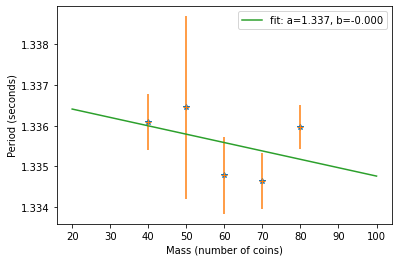

In [10]:
def pmPlot():
    xdata = np.linspace(20, 100, 50)
    m=90
    theMean = []
    theMass = []
    theError = []
    while m>40:
        m-=10
        fileName = 'periodsAreHere/'+str(m)+'-40-18'
        aData = open(fileName, 'rb')
        meanP,stdP,P= pickle.load(aData)
        aData.close()
        theMean.append(meanP)
        theMass.append(m)
        theError.append(stdP)
    popt, pcov = curve_fit(func1, theMass, theMean)
    plt.figure()
    plt.plot(theMass,theMean,'*')
    plt.errorbar(theMass, theMean, yerr = theError, fmt='+')
    plt.plot(xdata, func1(xdata, *popt),
             label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
    plt.xlabel('Mass (number of coins)')
    plt.ylabel('Period (seconds)')
    plt.legend()
    plt.show()
pmPlot()

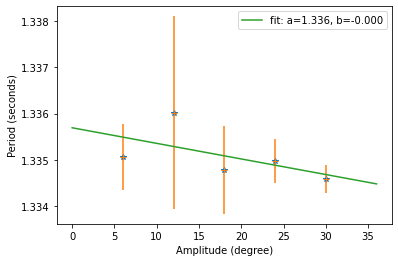

In [11]:
def paPlot():
    xdata = np.linspace(0, 36, 50)
    a=36
    theMean = []
    theAmplitude = []
    theError = []
    while a>6:
        a-=6
        fileName = 'periodsAreHere/'+'60-40-'+str(a)
        aData = open(fileName, 'rb')
        meanP,stdP,P= pickle.load(aData)
        aData.close()
        theMean.append(meanP)
        theAmplitude.append(a)
        theError.append(stdP)
    popt, pcov = curve_fit(func1, theAmplitude, theMean)
    plt.figure()
    plt.plot(theAmplitude,theMean,'*')
    plt.errorbar(theAmplitude, theMean, yerr = theError, fmt='+')
    plt.plot(xdata, func1(xdata, *popt),
             label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
    plt.xlabel('Amplitude (degree)')
    plt.ylabel('Period (seconds)')
    plt.legend()
    plt.show()
paPlot()

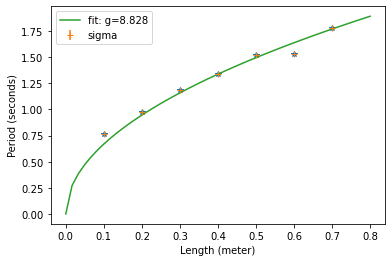

In [28]:
def plPlot():
    xdata = np.linspace(0, 0.80, 50)
    l=80
    theMean = []
    theLength = []
    theError = []
    while l>10:
        l-=10
        fileName = 'periodsAreHere/'+'60-'+str(l)+'-18'
        aData = open(fileName, 'rb')
        meanP,stdP,P= pickle.load(aData)
        aData.close()
        theMean.append(meanP)
        theLength.append(l/100)
        theError.append(stdP)
    popt, pcov = curve_fit(func, theLength, theMean)
    plt.figure()
    plt.plot(theLength,theMean,'*')
    plt.errorbar(theLength, theMean, yerr = theError, fmt='+', label='sigma')
    plt.plot(xdata, func(xdata, *popt),
             label='fit: g=%5.3f' % tuple(popt))
    plt.xlabel('Length (meter)')
    plt.ylabel('Period (seconds)')
    plt.legend()
    plt.show()
plPlot()

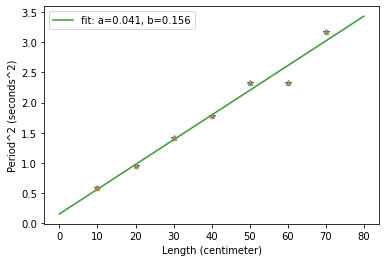

In [164]:
def p2lPlot():
    xdata = np.linspace(0, 80, 50)
    l=80
    theMean = []
    theLength = []
    theError = []
    while l>10:
        l-=10
        fileName = 'periodsAreHere/'+'60-'+str(l)+'-18'
        aData = open(fileName, 'rb')
        meanP,stdP,P= pickle.load(aData)
        aData.close()
        theMean.append(meanP**2)
        theLength.append(l)
        theError.append(stdP)
    popt, pcov = curve_fit(func, theLength, theMean)
    plt.figure()
    plt.plot(theLength,theMean,'*')
    plt.errorbar(theLength, theMean, yerr = theError, fmt='+')
    plt.plot(xdata, func(xdata, *popt),
             label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
    plt.xlabel('Length (centimeter)')
    plt.ylabel('Period^2 (seconds^2)')
    plt.legend()
    plt.show()
p2lPlot()

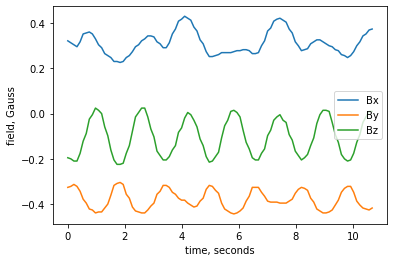

In [119]:
aData = open('rawDataIsHere/60-60-18-1','rb')
allTimes, allBx, allBy, allBz = pickle.load(aData)
aData.close()

plt.figure()
plt.plot(allTimes,allBx,label = 'Bx')
plt.plot(allTimes,allBy,label = 'By')
plt.plot(allTimes,allBz,label = 'Bz')
plt.xlabel('time, seconds')
plt.ylabel('field, Gauss')
plt.draw()
plt.gca().legend()

Text(0.5, 0, 'frequency, Hz')

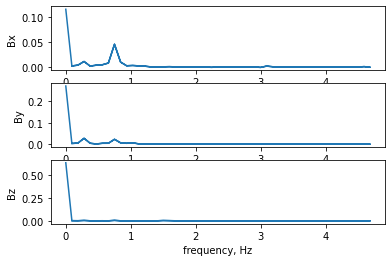

In [6]:
frequencies,powerSpectrumX = absFFT(allTimes,allBx)
frequencies,powerSpectrumY = absFFT(allTimes,allBy)
frequencies,powerSpectrumZ = absFFT(allTimes,allBz)
plt.figure()
plt.subplot(311)
plt.plot(frequencies,powerSpectrumX)
plt.ylabel('Bx')
plt.subplot(312)
plt.plot(frequencies,powerSpectrumY)
plt.ylabel('By')
plt.subplot(313)
plt.plot(frequencies,powerSpectrumZ)
plt.ylabel('Bz')
plt.xlabel('frequency, Hz')
#plt.legend()

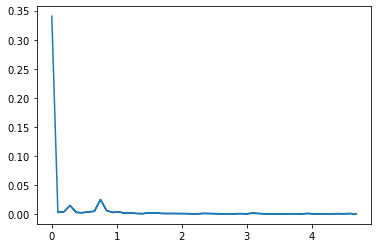

In [7]:
powerSpectrumAll = (np.array(powerSpectrumX)+np.array(powerSpectrumY)+np.array(powerSpectrumZ))/3
plt.figure()
plt.plot(frequencies, powerSpectrumAll)

In [72]:
(np.array([1,2,3])+np.array([4,5,6]))/2

array([2.5, 3.5, 4.5])

In [100]:
frequencies

array([0.        , 0.09361906, 0.18723812, 0.28085718, 0.37447624,
       0.4680953 , 0.56171436, 0.65533342, 0.74895248, 0.84257154,
       0.9361906 , 1.02980966, 1.12342872, 1.21704778, 1.31066684,
       1.4042859 , 1.49790496, 1.59152402, 1.68514308, 1.77876214,
       1.8723812 , 1.96600026, 2.05961932, 2.15323838, 2.24685744,
       2.3404765 , 2.43409556, 2.52771462, 2.62133368, 2.71495274,
       2.8085718 , 2.90219086, 2.99580992, 3.08942898, 3.18304804,
       3.2766671 , 3.37028616, 3.46390523, 3.55752429, 3.65114335,
       3.74476241, 3.83838147, 3.93200053, 4.02561959, 4.11923865,
       4.21285771, 4.30647677, 4.40009583, 4.49371489, 4.58733395,
       4.68095301, 4.58733395, 4.49371489, 4.40009583, 4.30647677,
       4.21285771, 4.11923865, 4.02561959, 3.93200053, 3.83838147,
       3.74476241, 3.65114335, 3.55752429, 3.46390523, 3.37028616,
       3.2766671 , 3.18304804, 3.08942898, 2.99580992, 2.90219086,
       2.8085718 , 2.71495274, 2.62133368, 2.52771462, 2.43409

In [101]:
powerSpectrumAll

array([3.40360551e-01, 2.80561540e-03, 3.88291095e-03, 1.46989646e-02,
       2.75053799e-03, 2.17301398e-03, 3.68237674e-03, 4.66172954e-03,
       2.48404381e-02, 6.01001517e-03, 2.65362748e-03, 3.42508528e-03,
       1.58379024e-03, 1.55142396e-03, 8.30434921e-04, 6.82452457e-04,
       2.08927880e-03, 1.81738313e-03, 9.85001339e-04, 8.24382280e-04,
       8.69223342e-04, 7.36394919e-04, 7.04404038e-04, 4.29064013e-04,
       4.53817153e-04, 9.81312017e-04, 7.78846195e-04, 5.57683450e-04,
       3.47129846e-04, 5.17810577e-04, 4.44840171e-04, 6.33506462e-04,
       3.73509206e-04, 1.38827798e-03, 8.37587508e-04, 4.23337305e-04,
       4.36701745e-04, 2.79130161e-04, 3.85058842e-04, 4.97567474e-04,
       4.86352401e-04, 3.56127437e-04, 8.78766529e-04, 3.68702518e-04,
       3.74796999e-04, 5.02434929e-04, 4.25689645e-04, 6.02931904e-04,
       4.57022394e-04, 7.94810976e-04, 1.44927536e-04, 7.94810976e-04,
       4.57022394e-04, 6.02931904e-04, 4.25689645e-04, 5.02434929e-04,
      

In [113]:
thePeak = powerSpectrumAll[1:].max()
list(powerSpectrumAll).index(thePeak)

92

In [115]:
f=frequencies[92]

In [116]:
1/f

1.3351981937885287

In [119]:
'1'+str(2)+'3'

'123'

In [124]:
a=2

In [127]:
a+=2
a

8

In [22]:
arr=np.array([])

In [96]:
arr=np.append(arr,str(0))

In [97]:
arr

array(['2.0', '1.0', '2.0', '0.0', '0.0', '0.0', '0'], dtype='<U32')

In [42]:
np.mean(arr)

1.0

In [41]:
np.std(arr,ddof=1)

1.0

In [89]:
aData = open('periodsAreHere/60-40-18','rb')
mean,std,period = pickle.load(aData)
aData.close()

In [90]:
mean

1.334780365228653

In [91]:
std

0.0009489788573267058

In [92]:
period

array([1.33457145, 1.33399981, 1.33620885, 1.33392352, 1.33519819])

In [20]:
np.pi

3.141592653589793